In [1]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rocky = io.imread('C:\\Users\\User\\Downloads\\rocky.jpg')

In [ ]:
rocky

In [8]:
rocky.shape

(778, 594, 3)

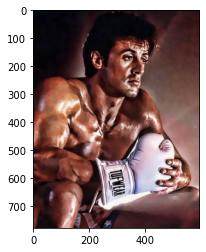

In [12]:
plt.imshow(rocky)

**EP2.1**

**Primeira função: RGB2Gray**

In [12]:
def rgb2cinza(img):
    return np.dot(img[...,:3], [0.2125, 0.7154, 0.0721])

In [13]:
rocky_cinza = rgb2cinza(rocky)
rocky_cinza.shape

(778, 594)

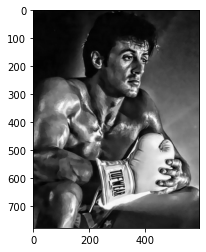

In [14]:
plt.imshow(rocky_cinza, cmap=plt.get_cmap('gray'))

**Segunda função: Soma de Fundo com gradiente de níveis de cinza**

**Terceira função: Log da Imagem**
1. Reescalar imagem para valores dos pixels ficarem entre 0 e 1.
2. Aplicar função O = gain\*log(1+I). (O=output, I=input)

In [5]:
rocky_cinza

array([[14.3701, 14.3701, 13.3701, ..., 22.6163, 22.3259, 22.3259],
       [14.3701, 14.3701, 13.3701, ..., 23.6163, 23.3259, 23.3259],
       [14.3701, 13.3701, 13.3701, ..., 23.1817, 23.1817, 23.1817],
       ...,
       [85.8828, 78.027 , 71.027 , ..., 27.948 , 29.0163, 29.0163],
       [88.8828, 83.027 , 76.027 , ..., 24.948 , 26.1605, 26.1605],
       [88.8828, 83.027 , 76.027 , ..., 24.948 , 26.1605, 26.1605]])

In [18]:
def log_im(img):
    #1.
    img_esc = img/255
    #2.
    gain = 1
    img_log = gain*np.log(1+img)
    return img_log

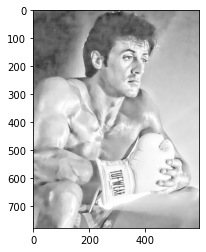

In [22]:
rocky_log = log_im(rocky_cinza)
plt.imshow(rocky_log, cmap=plt.get_cmap('gray'))

**Quarta função: Exp da Imagem**

**Quinta função: Filtro da média implementado usando convolução**

**EP2.2**

A normalização das imagens deve ser feita por equalização de histogramas, e as imagens normalizadas formarão o normalizedDataset.

In [27]:
def hist_eq(img, bins):
    img_hist, bin_edges = np.histogram(img.flatten(), bins, density=True)
    cdf = img_hist.cumsum() #Cumulative Distribution Function; a função que equaliza os pixels.
    cdf = 255 * cdf/cdf[-1] #Normalização
    
    #Usar interpolação linear da CDF para achar novos valores pros pixels
    img_n = np.interp(img.flatten(), bin_edges[:-1], cdf)
    return img_n.reshape(img.shape), cdf

In [28]:
rocky_norm, cdf = hist_eq(rocky_cinza, 256)

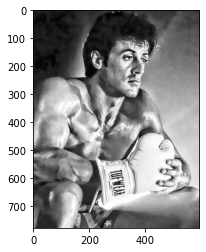

In [32]:
plt.imshow(rocky_norm, cmap=plt.get_cmap('gray'))

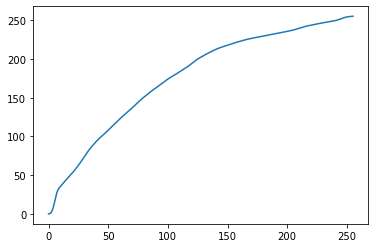

In [33]:
plt.plot(cdf)

Calcular para os datasets originalGrayDataset, augumentedDataset e normalizedDataset,
1. Protótipo médio de cada classe.
2. Histograma médio de cada classe.
3. Variância do histograma de cada classe.